# TODO
* Update scalars widgets

In [28]:
import pyvista as pv
import numpy as np
import xarray as xr
from JulesD3D.plotPyVista import makeBottomSurface, easyTimeFormat
from JulesD3D.processNetCDF import addDepth, fixCORs, fixMeshGrid, makeVelocity, addVectorSum
from JulesD3D.utils import ncFilepicker#, quickDF
from cmocean.cm import deep

In [2]:
pv.set_plot_theme("document") # for white background

In [3]:
folder = '/Users/julesblom/ThesisResults/Slope0.85'

nc_filename = ncFilepicker(folder)

In [4]:
nc_filename

Select(description='NetCDF file:', layout=Layout(height='120px', width='100%'), options=('/Users/julesblom/The…

In [31]:
trim = xr.open_dataset(nc_filename.value) # Open with xarray : DataSet : A collection of DataArrays

In [49]:
timestep = 3

In [50]:
bottom_stress_attrs = {'long_name': 'Bottom stress', 'units': 'N/m2', 'grid': 'grid', 'location': 'edge1'}
bottom_stres_dims = ('time', 'M', 'N')

In [51]:
if 'velocity' not in trim:
    trim = fixMeshGrid(trim, mystery_flag=True)
    trim = addDepth(trim)
    trim = makeVelocity(trim)
    trim = addVectorSum(trim, 'TAUKSI', 'TAUETA', key="bottom_stress", attrs=bottom_stress_attrs, dims=bottom_stres_dims)
    trim.attrs['JulesD3D'] = ['fixedCORS', 'fixedMesh', 'addedHorizontalVelocity', 'addedBottomStress']
else:
    print("DataSet is preprocessed, 'velocity' is already in DataSet")

------ Fixing mesh grid, assuming a uniform grid ------
x_gridstep:	 200.0 m
y_gridstep:	 200.0 m
width:		 26000.0 m
length:		 36200.0 m
132 x 182 grid


In [52]:
bottom_surface_grid = makeBottomSurface(trim)

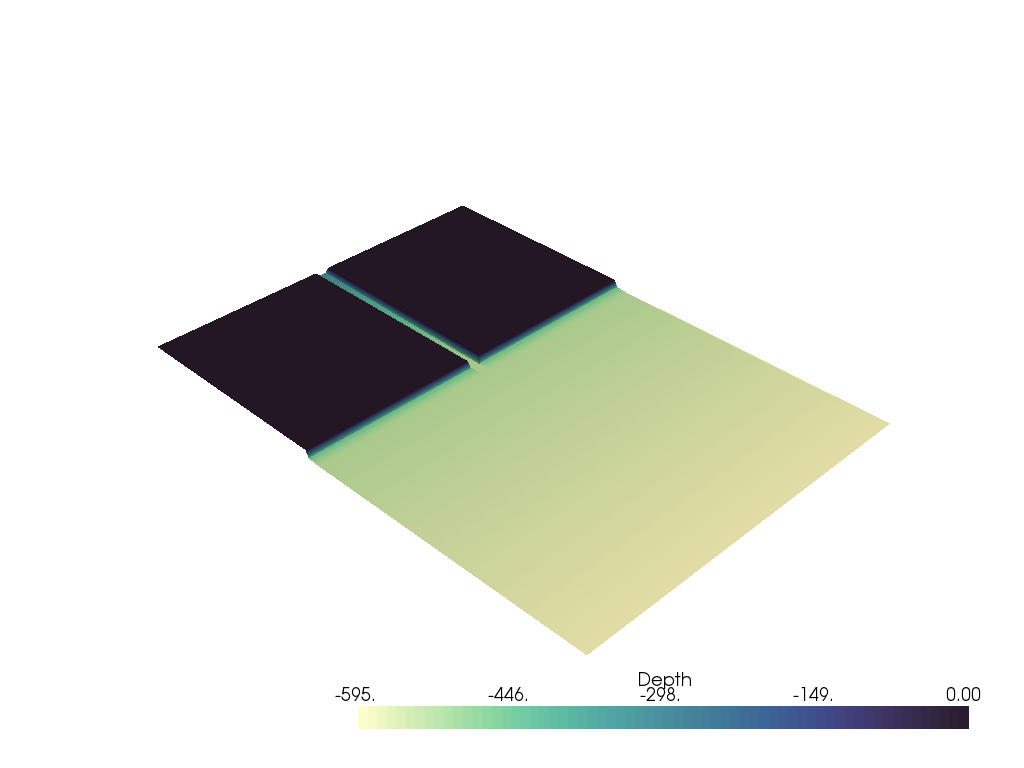

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [53]:
bottom_surface_grid.plot(cmap=deep)
# plot_title = f"{trim.bottom_stress.attrs['long_name']} ({trim.bottom_stress.attrs['units']})"

In [54]:
plot_bottom_stress = trim.bottom_stress.isel(time=timestep).values[1:-1,1:-1].T

In [55]:
plot_acc_sand_flux = np.ravel(trim.DMSEDCUM.isel(time=timestep, LSEDTOT=0).values[:-1,:-1].T)

In [56]:
plot_bottom_stress.size

23400

In [57]:
bottom_surface_grid.field_arrays['Acc Sand flux'] = plot_acc_sand_flux
bottom_surface_grid.field_arrays['Bottom stress'] = plot_bottom_stress

In [23]:
bottom_surface_grid

StructuredGrid (0x1211e5bb0)
  N Cells:	23091
  N Points:	23400
  X Bounds:	2.000e+02, 2.600e+04
  Y Bounds:	3.000e+02, 3.610e+04
  Z Bounds:	-5.952e+02, -0.000e+00
  Dimensions:	130, 180, 1
  N Arrays:	4

# Bottom Stress

In [59]:
p = pv.Plotter(notebook=False)
p.add_mesh(bottom_surface_grid, scalars='Bottom stress', cmap=deep, interpolate_before_map=False)
timestring = easyTimeFormat(trim.time.isel(time=timestep).values)
p.add_text(f"Bottom Stress at: {timestring}", position='upper_left')

# p.add_mesh(bottom_surface_grid, cmap=deep)#, scalars='Acc Sand flux', cmap='cividis', interpolate_before_map=False)
# p.add_scalar_bar(title=plot_title)
p.enable()
p.show_grid(zlabel='Depth [m]', xlabel='Width [m]', ylabel='Length [m]', ticks='outside', padding=0.3)
p.set_scale(zscale=20)
p.show()

2020-02-01T05:24:00.000000000


[(23772.679405506136, 24542.31510639866, 3297.809769926862),
 (13100.0, 18200.0, -297.5758972167969),
 (-0.6371950519306558, 0.7702421019086021, 0.026637759712621778)]

In [ ]:
# # https://docs.pyvista.org/plotting/plotting.html#plot-time-series-data

# bottom_surface_grid.field_arrays['anim_bottom_stress'] = trim.bottom_stress.isel(time=0).values[:-1,:-1].T

# # bottom_surface_grid.set_active_scalars('bottom_stress')

# animation_plotter = pv.BackgroundPlotter()
# animation_plotter.add_mesh(grid, lighting=True, scalars='anim_bottom_stress', cmap=deep, interpolate_before_map=False)
# animation_plotter.set_scale(zscale=10)
# animation_plotter.show_grid()
# animation_plotter.show()

# def update_bottom_stress():
#     for i in range(trim.time.size):
#         if i % 10 == 0:
#             print("time", i, "max: ", trim.bottom_stress.isel(time=i).max().values)

# #         # Update scalars
#         new_bottom_stress = trim.bottom_stress.isel(time=i).values[:-1,:-1].T
#         bottom_surface_grid.field_arrays['anim_bottom_stress'] = new_bottom_stress
#         time.sleep(0.05)


        
# thread = Thread(target=update_bottom_stress)
# thread.start()

In [ ]:
# Create a plotter object and set the scalars to the Z height
plotter = pv.Plotter()
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)
plotter.add_mesh(bottom_surface_grid, scalars=trim.bottom_stress.isel(time=0).values[:-1,:-1].T,
                 cmap=deep, interpolate_before_map=False, scalar_bar_args=sargs, stitle='Bottom Stress N/m2')
plotter.set_scale(zscale=15)
plotter.show_grid()

In [ ]:
# https://docs.pyvista.org/examples/02-plot/gif.html#sphx-glr-examples-02-plot-gif-py
# setup camera and close

plotter.show(auto_close=False)

# Open a gif
plotter.open_gif("bottomstress1.5.gif")

pts = grid.points.copy()

for i in range(trim.time.size):
    new_bottom_stress = trim.bottom_stress.isel(time=i).values[:-1,:-1].T.ravel()
#     print(trim.time.isel(time=i).values)
    plotter.update_scalars(new_bottom_stress)
    timetext = plotter.add_text("t = {}".format(trim.time.isel(time=i).values), position='upper_left')
    plotter.write_frame()
    plotter.remove_actor(timetext)
    
# Close movie and delete object
plotter.close()